In [1]:
import xarray as xr

# Load and inspect your files
ds_instant = xr.open_dataset('ERA5/data_stream-oper_stepType-accum.nc')
ds_accum = xr.open_dataset('ERA5/data_stream-oper_stepType-instant.nc')

print("Instant variables:", list(ds_instant.data_vars))
print("Accumulated variables:", list(ds_accum.data_vars))
print("Dimensions:", ds_instant.dims)


Instant variables: ['tp', 'cp']
Accumulated variables: ['sp', 'cbh', 'hcc', 'lcc', 'mcc', 'tclw', 'ptype', 'tcrw']
Dimensions: FrozenMappingWarningOnValuesAccess({'valid_time': 744, 'latitude': 137, 'longitude': 141})


C:\Users\HONOR\AppData\Local\Temp\ipykernel_60008\2287036697.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


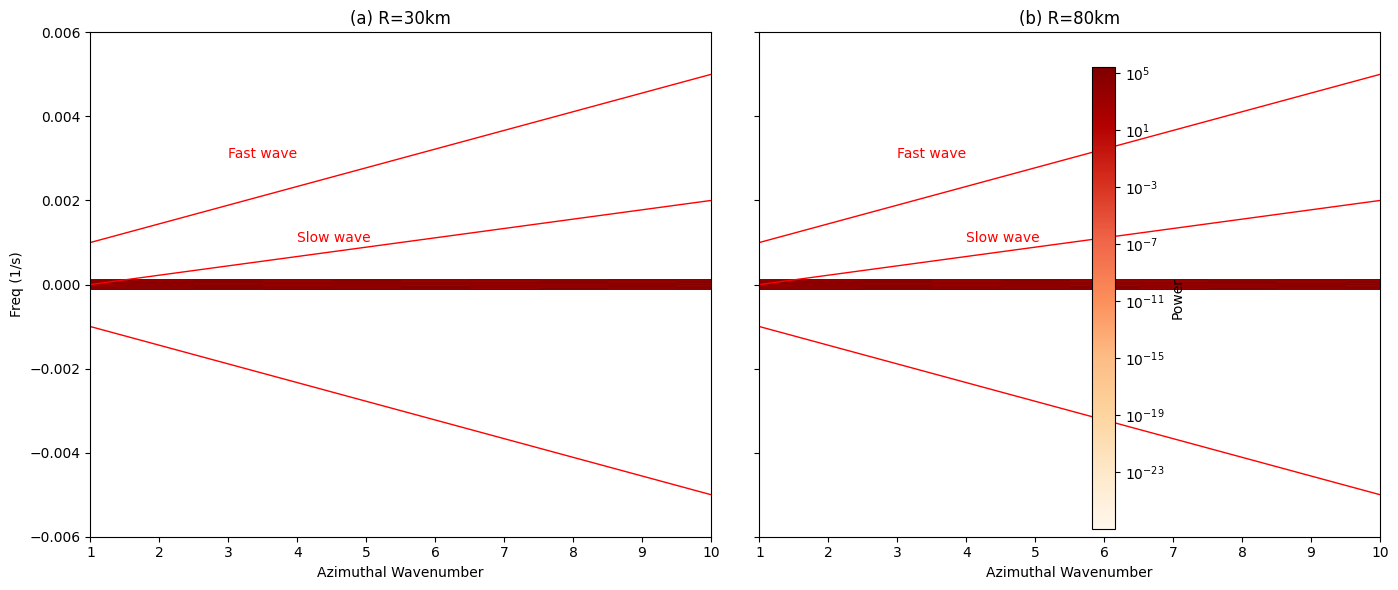

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
nt = 744                 # Number of time steps (e.g., one month of hourly data)
nphi = 36                # Number of azimuthal points (e.g., 10° spacing)
dt = 3600                # Time step in seconds (1 hour)
dphi = 2 * np.pi / nphi  # Azimuthal spacing in radians

# --- Dummy data: replace with your own (time, azimuth) array ---
# For real analysis, extract your variable (e.g., wind) at a given radius as arr[time, azimuth]
data = np.random.randn(nt, nphi)

# --- Detrend & windowing (optional but recommended) ---
data = data - np.mean(data, axis=0, keepdims=True)

# --- 2D FFT: time (rows), azimuth (cols) ---
spec = np.fft.fft2(data)
spec = np.fft.fftshift(spec)
power = np.abs(spec) ** 2

# --- Frequency and wavenumber axes ---
freq = np.fft.fftshift(np.fft.fftfreq(nt, d=dt))
wavenum = np.fft.fftshift(np.fft.fftfreq(nphi, d=dphi))  # in cycles/radian

# Convert wavenumber to integer azimuthal mode (1, 2, ..., nphi/2)
wavenum = np.arange(-nphi//2, nphi//2)
freq = np.fft.fftshift(np.fft.fftfreq(nt, d=dt))

# --- Plotting for two radii (dummy, repeat for each radius) ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for i, (ax, R) in enumerate(zip(axes, [30, 80])):
    # Select the relevant slice for this radius (use your real data)
    # Here we just use the same dummy spectrum for illustration
    pcm = ax.pcolormesh(
        wavenum[nphi//2:], freq, power[:, nphi//2:], 
        norm='log', cmap='OrRd', shading='auto'
    )
    ax.set_title(f'({chr(97+i)}) R={R}km')
    ax.set_xlabel('Azimuthal Wavenumber')
    if i == 0:
        ax.set_ylabel('Freq (1/s)')
    ax.set_xlim(1, 10)
    ax.set_ylim(-0.006, 0.006)
    
    # --- Overlay theoretical wave curves (example lines, replace with your theory) ---
    # Fast wave (dummy example)
    ax.plot([1, 10], [0.001, 0.005], 'r', lw=1)
    ax.plot([1, 10], [-0.001, -0.005], 'r', lw=1)
    ax.text(3, 0.003, 'Fast wave', color='r')
    # Slow wave (dummy example)
    ax.plot([1, 10], [0, 0.002], 'r', lw=1)
    ax.text(4, 0.001, 'Slow wave', color='r')

fig.colorbar(pcm, ax=axes, orientation='vertical', label='Power')
plt.tight_layout()
plt.show()


In [3]:
import os
import xarray as xr

# Verify ERA5 file existence with corrected paths
era5_instant_path = 'ERA5/data_stream-oper_stepType-instant.nc'
era5_accum_path = 'ERA5/data_stream-oper_stepType-accum.nc'

era5_files_exist = {
    'instant': os.path.exists(era5_instant_path),
    'accum': os.path.exists(era5_accum_path)
}

# Load ERA5 data if files exist
era5_data = {}
if era5_files_exist['instant']:
    era5_data['instant'] = xr.open_dataset(era5_instant_path)
    print("Loaded ERA5 instant data with variables:", list(era5_data['instant'].data_vars))
else:
    print(f"ERA5 instant file not found: {era5_instant_path}")

if era5_files_exist['accum']:
    era5_data['accum'] = xr.open_dataset(era5_accum_path)
    print("Loaded ERA5 accum data with variables:", list(era5_data['accum'].data_vars))
else:
    print(f"ERA5 accum file not found: {era5_accum_path}")

# Verify MERRA-2 directory existence
merra_dir = 'Aditya_MTech_Summer_internship_data/M2T1NXFLX_5.12.4-20250612_044055'
merra_exists = os.path.exists(merra_dir)

# Load MERRA-2 data if directory exists
merra_data = None
if merra_exists:
    try:
        # Attempt to load first file in directory
        merra_files = [f for f in os.listdir(merra_dir) if f.endswith('.nc') or f.endswith('.nc4')]
        if merra_files:
            first_merra_file = os.path.join(merra_dir, merra_files[0])
            merra_data = xr.open_dataset(first_merra_file)
            print("Loaded MERRA-2 data with variables:", list(merra_data.data_vars))
        else:
            print(f"No NetCDF files found in MERRA directory: {merra_dir}")
    except Exception as e:
        print(f"Error loading MERRA data: {str(e)}")
else:
    print(f"MERRA directory not found: {merra_dir}")

# Print summary
print("\nData Summary:")
print(f"ERA5 instant exists: {era5_files_exist['instant']}")
print(f"ERA5 accum exists: {era5_files_exist['accum']}")
print(f"MERRA directory exists: {merra_exists}")


Loaded ERA5 instant data with variables: ['sp', 'cbh', 'hcc', 'lcc', 'mcc', 'tclw', 'ptype', 'tcrw']
Loaded ERA5 accum data with variables: ['tp', 'cp']
Loaded MERRA-2 data with variables: ['BSTAR', 'CDH', 'CDM', 'CDQ', 'CN', 'DISPH', 'EFLUX', 'EVAP', 'FRCAN', 'FRCCN', 'FRCLS', 'FRSEAICE', 'GHTSKIN', 'HFLUX', 'HLML', 'NIRDF', 'NIRDR', 'PBLH', 'PGENTOT', 'PRECANV', 'PRECCON', 'PRECLSC', 'PRECSNO', 'PRECTOT', 'PRECTOTCORR', 'PREVTOT', 'QLML', 'QSH', 'QSTAR', 'RHOA', 'RISFC', 'SPEED', 'SPEEDMAX', 'TAUGWX', 'TAUGWY', 'TAUX', 'TAUY', 'TCZPBL', 'TLML', 'TSH', 'TSTAR', 'ULML', 'USTAR', 'VLML', 'Z0H', 'Z0M']

Data Summary:
ERA5 instant exists: True
ERA5 accum exists: True
MERRA directory exists: True


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
from scipy.interpolate import griddata
import os

# --- Helper Functions ---
def haversine(lon1, lat1, lon2, lat2):
    """Calculate distance using Haversine formula"""
    R = 6371.0  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

def azimuth(lon1, lat1, lon2, lat2):
    """Calculate azimuth angle"""
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    x = np.sin(dlon) * np.cos(lat2)
    y = np.cos(lat1)*np.sin(lat2) - np.sin(lat1)*np.cos(lat2)*np.cos(dlon)
    theta = np.arctan2(x, y)
    return (np.degrees(theta) + 360) % 360

def extract_radial_azimuthal_data(data, lats, lons, center_lat, center_lon, 
                                  target_radius, tolerance=10, n_azimuth_bins=36):
    """Extract data at a specific radius from center"""
    lon2d, lat2d = np.meshgrid(lons, lats)
    distances = haversine(center_lon, center_lat, lon2d, lat2d)
    azimuths = azimuth(center_lon, center_lat, lon2d, lat2d)
    
    # Find points within radius tolerance
    mask = np.abs(distances - target_radius) <= tolerance
    
    if not np.any(mask):
        return None, None, None
    
    # Create azimuthal bins
    azimuth_bins = np.linspace(0, 360, n_azimuth_bins + 1)
    azimuth_centers = (azimuth_bins[:-1] + azimuth_bins[1:]) / 2
    
    # Bin data by azimuth
    binned_data = np.zeros(len(azimuth_centers))
    bin_counts = np.zeros(len(azimuth_centers))
    
    valid_azimuths = azimuths[mask]
    valid_data = data[mask]
    
    for i in range(len(azimuth_centers)):
        az_min = azimuth_bins[i]
        az_max = azimuth_bins[i+1]
        
        # Find points in this azimuthal bin
        az_mask = (valid_azimuths >= az_min) & (valid_azimuths < az_max)
        
        if np.any(az_mask):
            binned_data[i] = np.nanmean(valid_data[az_mask])
            bin_counts[i] = np.sum(az_mask)
    
    return binned_data, azimuth_centers, bin_counts

def create_polar_plot(ax, azimuth_centers, values, radius, title, cmap='viridis', 
                      vmin=None, vmax=None, units=''):
    """Create polar plot of data at fixed radius"""
    # Convert to radians
    theta = np.deg2rad(azimuth_centers)
    
    # Plot the data
    bars = ax.bar(theta, values, width=np.deg2rad(360/len(theta)), 
                  bottom=0, color=plt.cm.get_cmap(cmap)(values))
    
    # Set plot properties
    ax.set_title(title, fontsize=10)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    # Add colorbar
    norm = Normalize(vmin=vmin or np.nanmin(values), vmax=vmax or np.nanmax(values))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label=units, pad=0.1)
    
    return ax

def create_azimuthal_profile(ax, azimuth_centers, values, title, color='blue', 
                             ylabel='', xlabel='Azimuth (degrees)'):
    """Create azimuthal profile plot"""
    ax.plot(azimuth_centers, values, 'o-', color=color, markersize=4)
    ax.set_title(title, fontsize=10)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 360)
    return ax

def create_spatial_map(ax, data, lats, lons, center_lat, center_lon, radius, 
                       title, cmap='viridis', vmin=None, vmax=None, units=''):
    """Create spatial map with center and radius marked"""
    # Plot data
    im = ax.pcolormesh(lons, lats, data, shading='auto', cmap=cmap, 
                      vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
    
    # Add features
    ax.coastlines()
    ax.gridlines(draw_labels=True)
    ax.set_title(title)
    
    # Add center point
    ax.plot(center_lon, center_lat, 'ro', markersize=8, transform=ccrs.PlateCarree())
    
    # Add radius circle
    theta = np.linspace(0, 2*np.pi, 100)
    circle_lons = center_lon + (radius/111) * np.cos(theta)
    circle_lats = center_lat + (radius/111) * np.sin(theta)
    ax.plot(circle_lons, circle_lats, 'r-', transform=ccrs.PlateCarree())
    
    # Add colorbar
    plt.colorbar(im, ax=ax, label=units, shrink=0.7)
    
    return ax

# --- Main Analysis ---
def analyze_atmospheric_data(era5_instant, era5_accum, merra_data, center_lat=20.0, center_lon=80.0):
    """Main function to analyze and plot atmospheric data"""
    
    # Create figure layout
    fig = plt.figure(figsize=(18, 20))
    gs = fig.add_gridspec(4, 4)
    
    # Set analysis radius
    analysis_radius = 80  # km
    
    # Define plot positions
    plot_positions = {
        'merra_prectot_map': gs[0, :2],
        'merra_pblh_map': gs[0, 2:],
        'merra_prectot_polar': gs[1, 0],
        'merra_pblh_polar': gs[1, 1],
        'merra_prectot_profile': gs[1, 2],
        'merra_pblh_profile': gs[1, 3],
        'era5_tp_map': gs[2, :2],
        'era5_cp_map': gs[2, 2:],
        'era5_tp_polar': gs[3, 0],
        'era5_cp_polar': gs[3, 1],
        'era5_tp_profile': gs[3, 2],
        'era5_cp_profile': gs[3, 3],
    }
    
    # --- MERRA-2 Analysis ---
    print("Processing MERRA-2 data...")
    merra_lats = merra_data.lat.values
    merra_lons = merra_data.lon.values
    
    # Total Precipitation (PRECTOT)
    if 'PRECTOT' in merra_data:
        merra_prectot = merra_data['PRECTOT'].mean(dim='time', skipna=True).values
        ax = fig.add_subplot(plot_positions['merra_prectot_map'], projection=ccrs.PlateCarree())
        create_spatial_map(ax, merra_prectot, merra_lats, merra_lons, center_lat, center_lon, 
                          analysis_radius, 'MERRA-2 Total Precipitation', 
                          cmap='RdBu', units='mm/day')
        
        # Extract radial data
        prectot_radial, az_centers, _ = extract_radial_azimuthal_data(
            merra_prectot, merra_lats, merra_lons, center_lat, center_lon, analysis_radius
        )
        
        if prectot_radial is not None:
            # Polar plot
            ax = fig.add_subplot(plot_positions['merra_prectot_polar'], projection='polar')
            create_polar_plot(ax, az_centers, prectot_radial, analysis_radius, 
                             'Precipitation at 80km Radius', cmap='RdBu', units='mm/day')
            
            # Profile plot
            ax = fig.add_subplot(plot_positions['merra_prectot_profile'])
            create_azimuthal_profile(ax, az_centers, prectot_radial, 
                                    'Azimuthal Distribution of Precipitation',
                                    color='blue', ylabel='Precipitation (mm/day)')
    
    # Planetary Boundary Layer Height (PBLH)
    if 'PBLH' in merra_data:
        merra_pblh = merra_data['PBLH'].mean(dim='time', skipna=True).values
        ax = fig.add_subplot(plot_positions['merra_pblh_map'], projection=ccrs.PlateCarree())
        create_spatial_map(ax, merra_pblh, merra_lats, merra_lons, center_lat, center_lon, 
                          analysis_radius, 'MERRA-2 Boundary Layer Height', 
                          cmap='viridis', units='m')
        
        # Extract radial data
        pblh_radial, az_centers, _ = extract_radial_azimuthal_data(
            merra_pblh, merra_lats, merra_lons, center_lat, center_lon, analysis_radius
        )
        
        if pblh_radial is not None:
            # Polar plot
            ax = fig.add_subplot(plot_positions['merra_pblh_polar'], projection='polar')
            create_polar_plot(ax, az_centers, pblh_radial, analysis_radius, 
                             'PBL Height at 80km Radius', cmap='viridis', units='m')
            
            # Profile plot
            ax = fig.add_subplot(plot_positions['merra_pblh_profile'])
            create_azimuthal_profile(ax, az_centers, pblh_radial, 
                                    'Azimuthal Distribution of PBL Height',
                                    color='green', ylabel='Height (m)')
    
    # --- ERA5 Analysis ---
    print("Processing ERA5 data...")
    era5_lats = era5_accum.latitude.values
    era5_lons = era5_accum.longitude.values
    
    # Total Precipitation (tp)
    if 'tp' in era5_accum:
        era5_tp = era5_accum['tp'].mean(dim='time', skipna=True).values
        ax = fig.add_subplot(plot_positions['era5_tp_map'], projection=ccrs.PlateCarree())
        create_spatial_map(ax, era5_tp, era5_lats, era5_lons, center_lat, center_lon, 
                          analysis_radius, 'ERA5 Total Precipitation', 
                          cmap='RdBu', units='m')
        
        # Extract radial data
        tp_radial, az_centers, _ = extract_radial_azimuthal_data(
            era5_tp, era5_lats, era5_lons, center_lat, center_lon, analysis_radius
        )
        
        if tp_radial is not None:
            # Polar plot
            ax = fig.add_subplot(plot_positions['era5_tp_polar'], projection='polar')
            create_polar_plot(ax, az_centers, tp_radial, analysis_radius, 
                             'Precipitation at 80km Radius', cmap='RdBu', units='m')
            
            # Profile plot
            ax = fig.add_subplot(plot_positions['era5_tp_profile'])
            create_azimuthal_profile(ax, az_centers, tp_radial, 
                                    'Azimuthal Distribution of Precipitation',
                                    color='blue', ylabel='Precipitation (m)')
    
    # Convective Precipitation (cp)
    if 'cp' in era5_accum:
        era5_cp = era5_accum['cp'].mean(dim='time', skipna=True).values
        ax = fig.add_subplot(plot_positions['era5_cp_map'], projection=ccrs.PlateCarree())
        create_spatial_map(ax, era5_cp, era5_lats, era5_lons, center_lat, center_lon, 
                          analysis_radius, 'ERA5 Convective Precipitation', 
                          cmap='Reds', units='m')
        
        # Extract radial data
        cp_radial, az_centers, _ = extract_radial_azimuthal_data(
            era5_cp, era5_lats, era5_lons, center_lat, center_lon, analysis_radius
        )
        
        if cp_radial is not None:
            # Polar plot
            ax = fig.add_subplot(plot_positions['era5_cp_polar'], projection='polar')
            create_polar_plot(ax, az_centers, cp_radial, analysis_radius, 
                             'Convective Precip at 80km Radius', cmap='Reds', units='m')
            
            # Profile plot
            ax = fig.add_subplot(plot_positions['era5_cp_profile'])
            create_azimuthal_profile(ax, az_centers, cp_radial, 
                                    'Azimuthal Distribution of Convective Precip',
                                    color='red', ylabel='Convective Precip (m)')
    
    # Final adjustments
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    fig.suptitle('Atmospheric Analysis: Monsoon Patterns over Indian Subcontinent', 
                 fontsize=16, fontweight='bold')
    return fig

# --- Data Loading ---
print("Loading data...")
era5_instant = xr.open_dataset('ERA5/data_stream-oper_stepType-accum.nc')
era5_accum = xr.open_dataset('ERA5/data_stream-oper_stepType-instant.nc')

# Load first MERRA-2 file in directory
merra_dir = 'Aditya_MTech_Summer_internship_data/M2T1NXFLX_5.12.4-20250612_044055'
merra_files = [f for f in os.listdir(merra_dir) if f.endswith('.nc')]
# Continue from: merra_files = [f for f in os.listdir(merra_dir) if f.endswith('.nc')]

# Sort files chronologically (assuming filename contains date)
merra_files.sort(key=lambda x: x.split('.')[-2])  # Adjust index based on your filename format



Loading data...


: 

In [ ]:
import xarray as xr
import os

# Use absolute path with forward slashes for Linux compatibility
merra_dir = 'Aditya_MTech_Summer_internship_data/M2T1NXFLX_5.12.4-20250612_044055'

# Verify directory exists
if not os.path.exists(merra_dir):
    raise FileNotFoundError(f"Directory not found: {merra_dir}")

# List all .nc4 files in the directory
merra_files = sorted([
    os.path.join(merra_dir, f)
    for f in os.listdir(merra_dir)
    if f.endswith('.nc4')
])

print(f"Found {len(merra_files)} MERRA-2 files")
print("Sample files:", merra_files[:3])

# Load all files into a single dataset
merra_data = xr.open_mfdataset(
    merra_files,
    combine='nested',
    concat_dim='time',
    parallel=True
)

# Print dataset summary
print("\nMERRA-2 Dataset Summary:")
print(f"Time range: {merra_data.time.min().values} to {merra_data.time.max().values}")
print(f"Variables: {list(merra_data.data_vars)}")
print(f"Dimensions: {merra_data.dims}")

# Continue with your analysis...


Found 30 MERRA-2 files
Sample files: ['Aditya_MTech_Summer_internship_data/M2T1NXFLX_5.12.4-20250612_044055\\MERRA2_400.tavg1_2d_flx_Nx.20201001.nc4', 'Aditya_MTech_Summer_internship_data/M2T1NXFLX_5.12.4-20250612_044055\\MERRA2_400.tavg1_2d_flx_Nx.20201002.nc4', 'Aditya_MTech_Summer_internship_data/M2T1NXFLX_5.12.4-20250612_044055\\MERRA2_400.tavg1_2d_flx_Nx.20201003.nc4']
